In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
dt=pd.read_excel("CocaCola_Sales_Rawdata.xlsx",sheet_name='Sheet1')
dt=dt.set_index('Quarter')
dt

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996
Q2_87,2104.411995
Q3_87,2014.362999
Q4_87,1991.746998
Q1_88,1869.049999


In [3]:
import re

In [4]:
dt.index

Index(['Q1_86', 'Q2_86', 'Q3_86', 'Q4_86', 'Q1_87', 'Q2_87', 'Q3_87', 'Q4_87',
       'Q1_88', 'Q2_88', 'Q3_88', 'Q4_88', 'Q1_89', 'Q2_89', 'Q3_89', 'Q4_89',
       'Q1_90', 'Q2_90', 'Q3_90', 'Q4_90', 'Q1_91', 'Q2_91', 'Q3_91', 'Q4_91',
       'Q1_92', 'Q2_92', 'Q3_92', 'Q4_92', 'Q1_93', 'Q2_93', 'Q3_93', 'Q4_93',
       'Q1_94', 'Q2_94', 'Q3_94', 'Q4_94', 'Q1_95', 'Q2_95', 'Q3_95', 'Q4_95',
       'Q1_96', 'Q2_96'],
      dtype='object', name='Quarter')

In [5]:
dt.index = dt.index.str.replace(r'(Q\d)_(\d+)',r'\2-\1')
dt.head()

,Sales
Quarter,
86-Q1,1734.827000
86-Q2,2244.960999
86-Q3,2533.804993
86-Q4,2154.962997
87-Q1,1547.818996


In [6]:
dt.index = pd.PeriodIndex(dt.index,freq='Q').to_timestamp()
dt.head()

,Sales
Quarter,
2086-01-01,1734.827000
2086-04-01,2244.960999
2086-07-01,2533.804993
2086-10-01,2154.962997
2087-01-01,1547.818996


In [7]:
dt.index

DatetimeIndex(['2086-01-01', '2086-04-01', '2086-07-01', '2086-10-01',
               '2087-01-01', '2087-04-01', '2087-07-01', '2087-10-01',
               '2088-01-01', '2088-04-01', '2088-07-01', '2088-10-01',
               '2089-01-01', '2089-04-01', '2089-07-01', '2089-10-01',
               '2090-01-01', '2090-04-01', '2090-07-01', '2090-10-01',
               '2091-01-01', '2091-04-01', '2091-07-01', '2091-10-01',
               '2092-01-01', '2092-04-01', '2092-07-01', '2092-10-01',
               '2093-01-01', '2093-04-01', '2093-07-01', '2093-10-01',
               '2094-01-01', '2094-04-01', '2094-07-01', '2094-10-01',
               '2095-01-01', '2095-04-01', '2095-07-01', '2095-10-01',
               '2096-01-01', '2096-04-01'],
              dtype='datetime64[ns]', name='Quarter', freq='QS-OCT')

In [8]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42 entries, 2086-01-01 to 2096-04-01
Freq: QS-OCT
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   42 non-null     float64
dtypes: float64(1)
memory usage: 672.0 bytes


# TIME SERIES ANALYSIS

<AxesSubplot:xlabel='Quarter'>

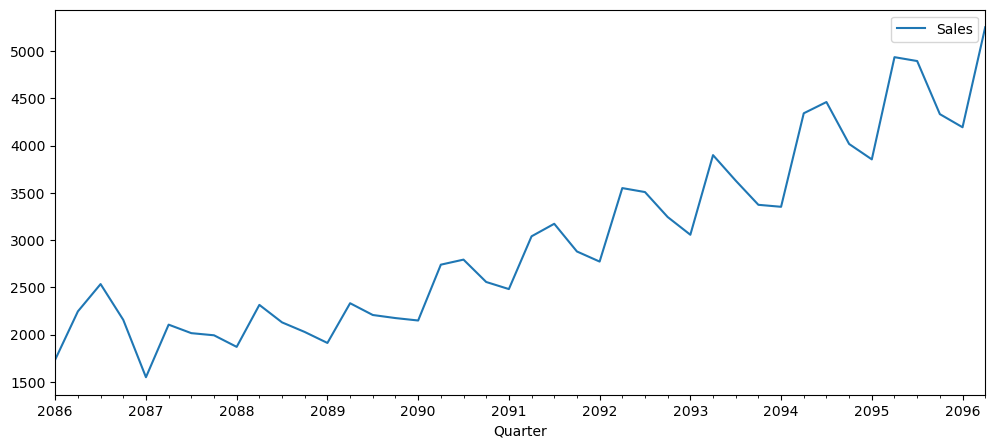

In [9]:
#LINE PLOTING
dt.plot(figsize=(12,5))

<AxesSubplot:>

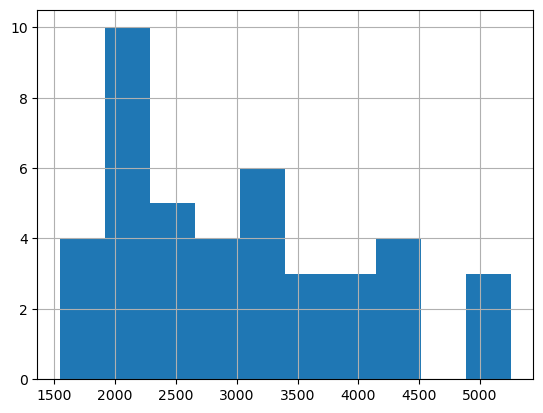

In [10]:
#ploting Histogram
dt['Sales'].hist()

<AxesSubplot:ylabel='Density'>

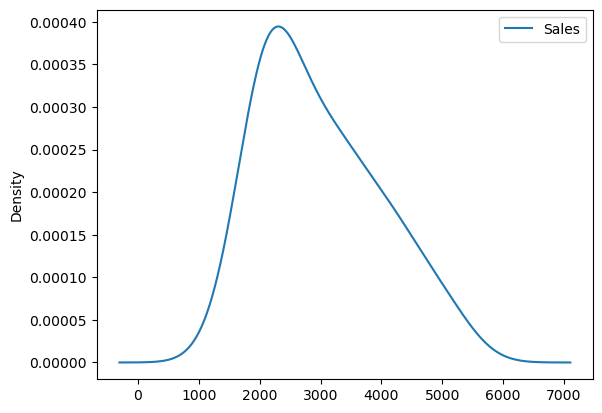

In [11]:
#Density ploting
dt.plot(kind='kde')

In [12]:
dt.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


# TIME SERIES DECOMPOSITION

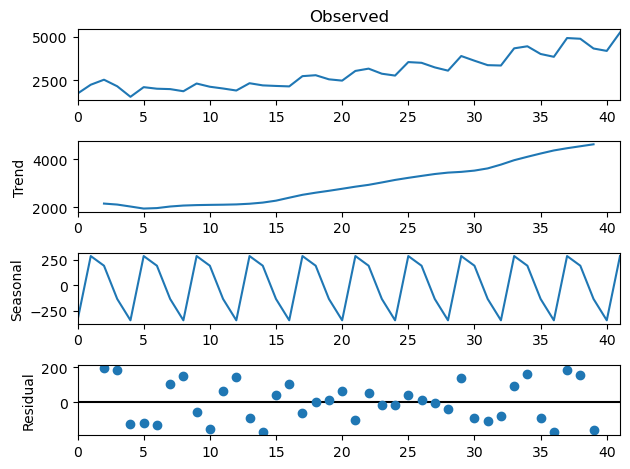

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
ts_de=seasonal_decompose((dt.values),period=4,model='additive')
ts_plot = ts_de.plot()

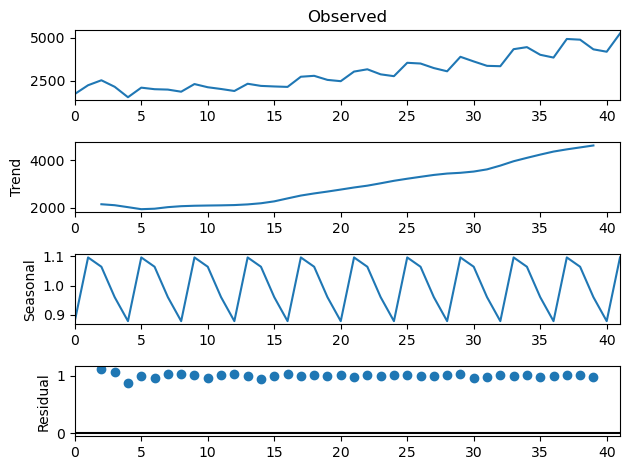

In [14]:
ts_decomp_mul= seasonal_decompose((dt.values),model='multiplicative',period = 4)
ts_plot_mul = ts_decomp_mul.plot()

# FORECASTING MODELS BUILDING

In [15]:
len(dt)

42

In [16]:
dt_train=dt[0:28]
dt_test=dt[28:]

In [17]:
print("length of the train data:",len(dt_train))
print("length of the test data:",len(dt_test))

length of the train data: 28
length of the test data: 14


# METHODS FOR FORECASTING

# 1.SIMPLE MOVING AVERAGE

In [18]:
dt_ma=dt.copy()

In [19]:
train_len=28

In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
#RMSE AND MAPE
roll_val=[]
rmse_val=[]

for i in range(4,28,4):
    dt_ma['ma_forecast'] = dt_ma['Sales'].rolling(i).mean()
    dt_ma['ma_forecast'][train_len:] = dt_ma['ma_forecast'][train_len-1]
    rmse_ma = mean_squared_error(dt_test['Sales'],dt_ma['ma_forecast'][train_len:],squared=False).round(2)
    roll_val.append(i)
    rmse_val.append(rmse_ma)

In [22]:
d=pd.DataFrame({'Rolling window':roll_val,'rmse':rmse_val})
d

,Rolling window,rmse
0,4,1049.59
1,8,1205.98
2,12,1357.90
3,16,1527.27
4,20,1643.99
5,24,1749.03


In [23]:
dt_ma['ma_forecast'] = dt_ma['Sales'].rolling(4).mean()
dt_ma['ma_forecast'][train_len:] = dt_ma['ma_forecast'][train_len-1]
rmse_ma = mean_squared_error(dt_test['Sales'],dt_ma['ma_forecast'][train_len:],squared=False).round(2)
rmse_ma

1049.59

# 2:-SIMPLE EXPONENTIAL SMOOTHING

In [24]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [25]:
ses_model = SimpleExpSmoothing(dt_train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = dt_test.index[0],end = dt_test.index[-1])

In [26]:
rmse_ses = mean_squared_error(dt_test['Sales'],pred_ses,squared=False).round(2)
rmse_ses

1225.36

# 3.HOLT'S METHOD

In [27]:
from statsmodels.tsa.holtwinters import Holt

In [28]:
holt_model = Holt(dt_train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_holt = holt_model.predict(start = dt_test.index[0],end = dt_test.index[-1])

In [29]:
rmse_holt = mean_squared_error(dt_test['Sales'],pred_holt,squared=False).round(2)
rmse_holt

538.41

# 4. Holt's Exponential Smoothing

a. Additive Method

In [30]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [31]:
hes_add_add = ExponentialSmoothing(dt_train['Sales'],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_hes_add_add = hes_add_add.predict(start = dt_test.index[0],end = dt_test.index[-1])

In [32]:
rmse_hes = mean_squared_error(dt_test['Sales'],pred_hes_add_add,squared=False).round(2)
rmse_hes

546.14

b. Multiplicative Method

In [33]:
hes_mul_add = ExponentialSmoothing(dt_train['Sales'],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hes_mul_add = hes_mul_add.predict(start = dt_test.index[0],end = dt_test.index[-1])

In [34]:
rmse_hes_mul = mean_squared_error(dt_test['Sales'],pred_hes_mul_add,squared=False).round(2)
rmse_hes_mul

720.97

# 5. ARIMA mode

ACF PLOT

In [35]:
from statsmodels.graphics.tsaplots import plot_acf

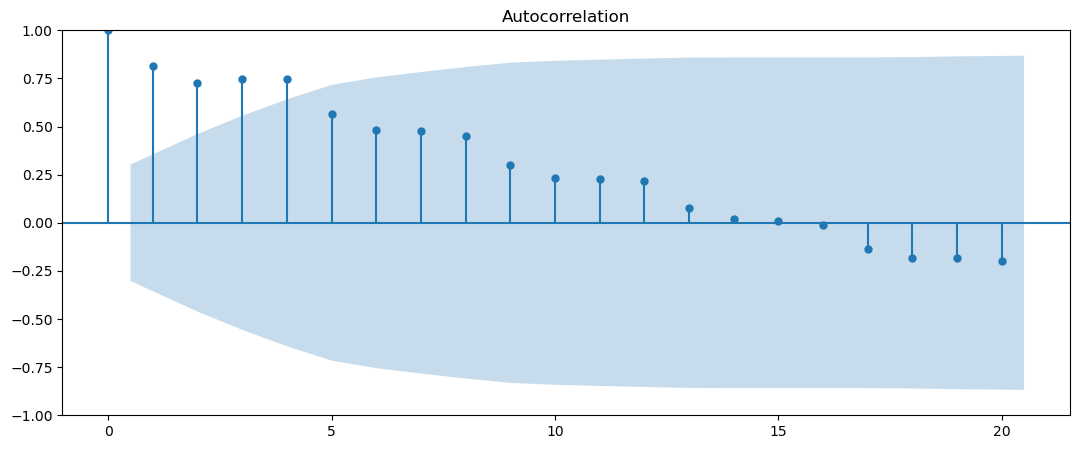

In [36]:
plt.figure(figsize=(13,5))
plot = plot_acf(dt['Sales'],ax=plt.gca(),lags = 20)
plt.show()

PCF PLOT

In [37]:
from statsmodels.graphics.tsaplots import plot_pacf

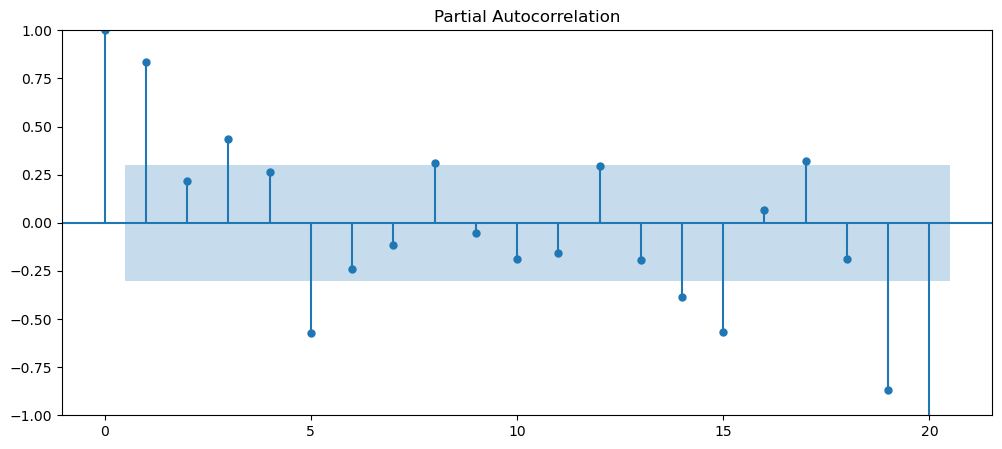

In [38]:
plt.figure(figsize=(12,5))
plot1 = plot_pacf(dt['Sales'], ax=plt.gca(),lags=20)
plt.show()

# ARIMA

In [39]:
from statsmodels.tsa.arima.model import ARIMA

In [40]:
arima=ARIMA(dt_train['Sales'],order=(1,1,1)).fit()
pred_arima = arima.predict(start = dt_test.index[0],end = dt_test.index[-1])

In [41]:
rmse_arima = mean_squared_error(dt_test['Sales'],pred_arima,squared=False).round(2)
rmse_arima

1062.27

In [42]:
models=['simple_moving_average','simple_expo_smoothing','Holt','Holt_additive','Holt_multiplicative','ARIMA']
rmse=[rmse_ma,rmse_ses,rmse_holt,rmse_hes,rmse_hes_mul,rmse_arima]
d={'Models':models,'Rmse':rmse}
dt_model=pd.DataFrame(d)
dt_model

,Models,Rmse
0,simple_moving_average,1049.59
1,simple_expo_smoothing,1225.36
2,Holt,538.41
3,Holt_additive,546.14
4,Holt_multiplicative,720.97
5,ARIMA,1062.27


In [43]:
dt_model.sort_values(by='Rmse')

,Models,Rmse
2,Holt,538.41
3,Holt_additive,546.14
4,Holt_multiplicative,720.97
0,simple_moving_average,1049.59
5,ARIMA,1062.27
1,simple_expo_smoothing,1225.36


So here the Holt's method is the best and the it has the lower rmse of all models